Kelompok 11
<br>
C14210005 - Joshua Briantama Hanjaya
<br>
C14210177 - Alfred Wisana
<br>
C14210185 - Frederika Handoyo

Link Youtube
<br>
https://youtu.be/I0aaiGuzTuw

In [56]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

No 1: Introduction to Dataset

Dataset ini digunakan untuk menyelesaikan masalah umum dalam pemrosesan email, yaitu membedakan antara email yang merupakan spam (pesan yang tidak diinginkan) dan email yang merupakan komunikasi yang diinginkan. Dataset ini bertujuan untuk mengembangkan model machine learning yang mampu mengklasifikasikan email sebagai spam atau bukan spam berdasarkan fitur-fitur yang terkandung dalam pesan email tersebut.

Features: crtl.tot, dollar, bang, money, n000, make, yesno

In [57]:
url = 'https://github.com/alfredwisana/machine_learning/raw/main/spam.csv'
df = pd.read_csv(url)

No 2: Data Preprocessing

Melakukan normalisasi data dengan mentransformasi data pada kolom 'yesno' yang awalnya bernilai 'y' & 'n' menjadi '1' & '0'

In [58]:
# encoding preprocessing cleaning
df['yesno'] = df['yesno'].replace('y',1)
df['yesno'] = df['yesno'].replace('n',0)
print(df.isnull().sum())
df.head()

crl.tot    0
dollar     0
bang       0
money      0
n000       0
make       0
yesno      0
dtype: int64


crl.tot  dollar   bang  money  n000  make  yesno
0      278   0.000  0.778   0.00  0.00  0.00      1
1     1028   0.180  0.372   0.43  0.43  0.21      1
2     2259   0.184  0.276   0.06  1.16  0.06      1
3      191   0.000  0.137   0.00  0.00  0.00      1
4      191   0.000  0.135   0.00  0.00  0.00      1

In [59]:
# correlation matrix
df.corr()

crl.tot    dollar      bang     money      n000      make     yesno
crl.tot  1.000000  0.201948  0.036321  0.080993  0.165977  0.089165  0.249164
dollar   0.201948  1.000000  0.142913  0.104691  0.310971  0.117419  0.323629
bang     0.036321  0.142913  1.000000  0.051076  0.070103  0.058292  0.241888
money    0.080993  0.104691  0.051076  1.000000  0.052587  0.188155  0.216111
n000     0.165977  0.310971  0.070103  0.052587  1.000000  0.134072  0.334787
make     0.089165  0.117419  0.058292  0.188155  0.134072  1.000000  0.126208
yesno    0.249164  0.323629  0.241888  0.216111  0.334787  0.126208  1.000000

In [60]:
df.describe()

crl.tot       dollar         bang        money         n000  \
count   4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean     283.289285     0.075811     0.269071     0.094269     0.101645   
std      606.347851     0.245882     0.815672     0.442636     0.350286   
min        1.000000     0.000000     0.000000     0.000000     0.000000   
25%       35.000000     0.000000     0.000000     0.000000     0.000000   
50%       95.000000     0.000000     0.000000     0.000000     0.000000   
75%      266.000000     0.052000     0.315000     0.000000     0.000000   
max    15841.000000     6.003000    32.478000    12.500000     5.450000   

              make        yesno  
count  4601.000000  4601.000000  
mean      0.104553     0.394045  
std       0.305358     0.488698  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     1.000000  
max       4.540000     1.000000

In [61]:
df_copy = df.copy(deep=True)

Normalisasi (scaling) pada kolom 'crl.tot' dalam DataFrame df_copy menggunakan teknik Min-Max Normalization untuk mengubah nilai-nilai dalam kolom sehingga memiliki rentang yang sama dengan kolom yang lain

In [62]:
scaler = MinMaxScaler()
df_copy['crl.tot'] = scaler.fit_transform(df_copy[['crl.tot']])
df_copy

crl.tot  dollar   bang  money  n000  make  yesno
0     0.017487   0.000  0.778   0.00  0.00  0.00      1
1     0.064836   0.180  0.372   0.43  0.43  0.21      1
2     0.142551   0.184  0.276   0.06  1.16  0.06      1
3     0.011995   0.000  0.137   0.00  0.00  0.00      1
4     0.011995   0.000  0.135   0.00  0.00  0.00      1
...        ...     ...    ...    ...   ...   ...    ...
4596  0.005492   0.000  0.000   0.00  0.00  0.31      0
4597  0.000821   0.000  0.353   0.00  0.00  0.00      0
4598  0.007386   0.000  0.000   0.00  0.00  0.30      0
4599  0.004861   0.000  0.000   0.00  0.00  0.96      0
4600  0.002462   0.000  0.125   0.00  0.00  0.00      0

[4601 rows x 7 columns]

In [63]:
X = df_copy.drop('yesno', axis=1)
y = df_copy.yesno
#data dipisah menjadi training dan testing
X_temp, X_test, y_temp, y_test = train_test_split(X,y,test_size=0.3,random_state=123)
#data dipisah menjadi trainging dan validation
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=123)

NO. 3: Machine Learning Algorithm Using Logistic Regression

Pemodelan Data kedalam bentuk model logistic regression untuk mengkalifikasikan data termasuk ke dalam spam atau tidak dengan fitur yang ada di dalam dataset

P value Test dengan
alpha = 5% (0.05)

In [64]:
#mencari p value
model_sm = sm.Logit(y_train,X_train)
result = model_sm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.600864
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  yesno   No. Observations:                 2254
Model:                          Logit   Df Residuals:                     2248
Method:                           MLE   Df Model:                            5
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:                  0.1004
Time:                        17:40:23   Log-Likelihood:                -1354.3
converged:                       True   LL-Null:                       -1505.5
Covariance Type:            nonrobust   LLR p-value:                 3.118e-63
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
crl.tot       -4.0250      1.718     -2.343      0.019      -7.392      -0.658
dollar         4.2339      0.695      6.091      0.000       2.871       5.596
bang           0.1137      0.071      1.593      0.111      -0.026       0.254
money          1.6571      0.333      4.974      0.000       1.004       2.310
n000           3.4547      0.568      6.079      0.000       2.341       4.569
make          -0.9044      0.217     -4.167      0.000      -1.330      -0.479
==============================================================================
"""

H0: Predictor tidak memiliki relasi yang signifikan terhadap response
<br>
H1: Predictor memiliki relasi yang signifikan terhadap response

Feature crl.tot dengan p value 0.019, berarti crl.tot tolak H0, sehingga variable crl.tot memiliki relasi yang kuat terhadap respons
<br>
Feature dollar dengan p value 0.000, berarti dollar tolak H0, sehingga variable dollar memiliki relasi yang kuat terhadap respons
<br>
Feature bang dengan p value 0.111, berarti bang menerima H0, karena p_value lebih besar dibandingkan dengan alpha, sehingga variable bang tidak  memiliki relasi yang kuat terhadap respons
<br>
Feature money dengan p value 0.000, berarti money tolak H0, sehingga variable money memiliki relasi yang kuat terhadap respons
<br>
Feature n000 dengan p value 0.000, berarti n000 tolak H0, sehingga variable n000 memiliki relasi yang kuat terhadap respons
<br>
Feature make dengan p value 0.000, berarti make tolak H0, sehingga variable make memiliki relasi yang kuat terhadap respons

In [65]:
#Akurasi test data
logistic_regression = LogisticRegression(solver='lbfgs',max_iter=200, random_state=1234)
logistic_regression.fit(X_train,y_train)

y_test_pred = logistic_regression.predict(X_test)
acc_score=accuracy_score(y_test,y_test_pred)
print('accuracy score = %0.2f'%acc_score)

accuracy score = 0.83


In [66]:
auc_score = roc_auc_score(y_test,y_test_pred)
print('AUC Score: %0.2f'%auc_score)

AUC Score: 0.80


Dengan model Logistic Regressi, akurasi untuk mengklasisifikasikan data yang merupakan spam email maupun bukan sebesar 0.83 atau 83%, dengan akurasi sebesar 83% logistic regression cukup bagus untuk digunakan dalam klasifikasi data ini

Logistic Regression Graphic

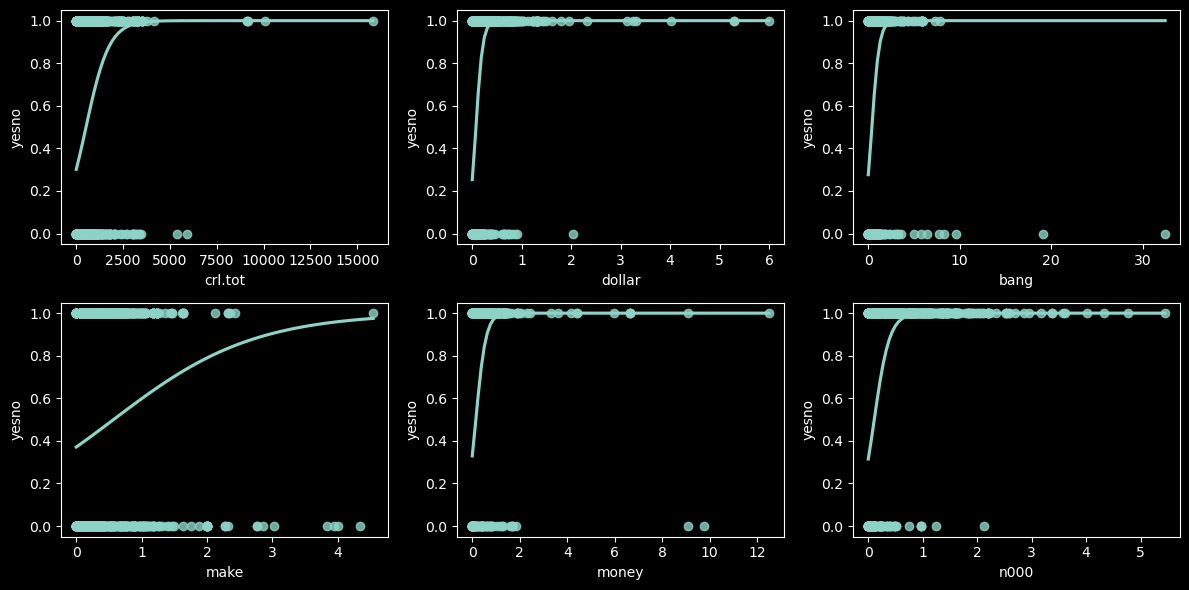

In [111]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
sns.regplot(x=df['crl.tot'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,2)
sns.regplot(x=df['dollar'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,3)
sns.regplot(x=df['bang'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,4)
sns.regplot(x=df['make'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,5)
sns.regplot(x=df['money'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,6)
sns.regplot(x=df['n000'], y=df['yesno'], logistic=True, ci=None)

plt.tight_layout()
plt.show()

CONFOUNDING

MAKE IMPOSTOR

In [68]:
X_crltot_bang = X_train[['bang','make']]
model_confounding = sm.Logit(y_train,X_crltot_bang)
res = model_confounding.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.679079
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  yesno   No. Observations:                 2254
Model:                          Logit   Df Residuals:                     2252
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:                -0.01668
Time:                        17:40:23   Log-Likelihood:                -1530.6
converged:                       True   LL-Null:                       -1505.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
bang           0.6601      0.107      6.166      0.000       0.450       0.870
make           0.1264      0.156      0.812      0.417      -0.179       0.432
==============================================================================
"""

In [69]:
lr = LogisticRegression()
lr.fit(X_train[['make']],y_train)
y_cf_pred = lr.predict(X_val[['make']])
roc_auc_score(y_val,y_cf_pred)

0.5338962480840371

In [70]:
lr = LogisticRegression()
lr.fit(X_train[['bang']],y_train)
y_cf_pred = lr.predict(X_val[['bang']])
roc_auc_score(y_val,y_cf_pred)

0.6546344949724235

In [71]:
lr = LogisticRegression()
lr.fit(X_train[['bang','make']],y_train)
y_cf_pred = lr.predict(X_val[['bang','make']])
roc_auc_score(y_val,y_cf_pred)

0.6637344756442355

In [72]:
lr = LogisticRegression()
lr.fit(X_train.drop('make',axis=1),y_train)
y_cf_pred = lr.predict(X_val.drop('make',axis=1))
roc_auc_score(y_val,y_cf_pred)

0.7763908429337493

In [73]:
lr = LogisticRegression()
lr.fit(X_train.drop('crl.tot',axis=1),y_train)
y_cf_pred = lr.predict(X_val.drop('crl.tot',axis=1))
roc_auc_score(y_val,y_cf_pred)

0.7663042256813186

In [74]:
lr = LogisticRegression()
lr.fit(X_train.drop('bang',axis=1),y_train)
y_cf_pred = lr.predict(X_val.drop('bang',axis=1))
roc_auc_score(y_val,y_cf_pred)

0.7385165840349166

In [75]:
lr = LogisticRegression()
lr.fit(X_train.drop('money',axis=1),y_train)
y_cf_pred = lr.predict(X_val.drop('money',axis=1))
roc_auc_score(y_val,y_cf_pred)

0.7583055022407214

In [76]:
lr = LogisticRegression()
lr.fit(X_train.drop('n000',axis=1),y_train)
y_cf_pred = lr.predict(X_val.drop('n000',axis=1))
roc_auc_score(y_val,y_cf_pred)

0.7693270644078157

In [77]:
lr = LogisticRegression()
lr.fit(X_train.drop('dollar',axis=1),y_train)
y_cf_pred = lr.predict(X_val.drop('dollar',axis=1))
roc_auc_score(y_val,y_cf_pred)

0.7574537134843329

Dalam data spam email ini, kolom 'bang' adalah data yang bersifat confounding.
<br>
'bang' merupakan confounding karena, jika bang dihilangkan pada model nilai yang dihasilkan oleh AUC (Dalam kasus ini menggunakan AUC) mengalamai penurunan nilai yang signifikan atau perubahan yang sangat besar.

CONFUSION MATRIX

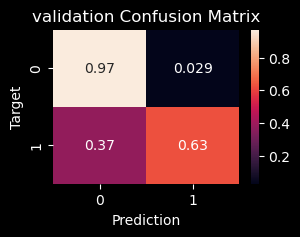

In [78]:
cf = confusion_matrix(y_test, y_test_pred, normalize='true')
plt.figure(figsize=(3,2))
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('validation'));

Dengan menggunakan confusion matrix, hasil yang dihasilkan oleh Logistic Regression cukup akurat dengan data
<br>
target spam dengan prediksi spam yang sebesar 97%, namun untuk data target spam dengan prediction spam sebesar 63% cukup akurat dan dapat ditraining untuk menghasilkan data yang lebih baik

ROC AUC SCORE

In [79]:
y_val_pred = logistic_regression.predict(X_val)
y_train_pred = logistic_regression.predict(X_train)

In [80]:
roc_val = roc_auc_score(y_val,y_val_pred)
print('roc_auc_score = %0.2f'%roc_val)
roc_val = round(roc_val,2)

roc_auc_score = 0.78


In [81]:
# Training Data
roc_train = roc_auc_score(y_train,y_train_pred)
print('roc_auc_score = %0.2f'%roc_train)
roc_train = round(roc_train,2)

roc_auc_score = 0.78


In [82]:
if roc_val < roc_train:
    print("The Model is overfit")
elif roc_val > roc_train:
    print("The Model may be underfit")
else:
    print("The Model is neither overfit nor underfit")

The Model is neither overfit nor underfit


Dengan menggunakan ROC AUC, model logistic regression memiliki hasil yang cukup akurat dengan nilai AUC testing data 0.85, dengan nilai AUC >0.5, model memiliki tingkat akurasi yang lebih baik dibandingkan dengan kemungkinan yang random. Model yang dicoba dinyatakan akurat karena AUC pada testing dan validasi juga diatas 0.5 dengan nilai 0.78

NO 4. Resampling Method

Resampling menggunakan validation set.

In [83]:
mse = mean_squared_error(y_val,y_val_pred)
print("MSE: %0.2f"%mse)

MSE: 0.18


MSE yang dihasilkan oleh model logistic regression adalah 18%, MSE ini tergolong kecil sehingga model dapat menghasilkan hasil klasifikasi yang akurat dengan hasil akan mendekati dengan nilai yang sebenarnya

In [84]:
#Validation Data
y_val_pred = logistic_regression.predict(X_val)
acc_score_val=accuracy_score(y_val,y_val_pred)
print('accuracy score = %0.2f'%acc_score)

accuracy score = 0.83


In [85]:
#Train Data
y_train_pred = logistic_regression.predict(X_train)
acc_score_train=accuracy_score(y_train,y_train_pred)
print('accuracy score = %0.2f'%acc_score)

accuracy score = 0.83


Data yang dilakukan resampling meggunakan validation set, memiliki akurasi yang kurang lebih saman dengan data yang diprose menggunakan dengan logistic regression

In [86]:
# k-fold cross validation
score = cross_val_score(logistic_regression,X_train,y_train,scoring=None,cv=10)
score_mean=score.mean()
print('Score Mean: %0.2f'%score_mean)

Score Mean: 0.81


KFOLD VALIDATION

In [87]:
#evaluasi menggunakan kfold cross validation
kf = KFold(n_splits=10)
# pembagian ke dalam 10 fold untuk kfold cross validation
mse_scores = []
fold = 1
for train_index, val_index in kf.split(X_temp):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    logistic_regression.fit(X_train,y_train)
    y_pred = logistic_regression.predict(X_val)
    mse = mean_squared_error(y_val,y_pred)
    acc_score = accuracy_score(y_val,y_pred)
    mse_scores.append(mse)
    print("="*50)
    print(f"Fold : {fold}")
    print("="*50)
    print("mean squared error %0.2f"%mse)
    print("accuracy score %0.2f"%acc_score)
    print("="*50)
    fold+=1
    
avg_mse = sum(mse_scores)/len(mse_scores)
print("Average MSE Across All Folds:", avg_mse)
print("score:", accuracy_score(y_val,y_pred))

Fold : 1
mean squared error 0.18
accuracy score 0.82
Fold : 2
mean squared error 0.24
accuracy score 0.76
Fold : 3
mean squared error 0.26
accuracy score 0.74
Fold : 4
mean squared error 0.18
accuracy score 0.82
Fold : 5
mean squared error 0.23
accuracy score 0.77
Fold : 6
mean squared error 0.25
accuracy score 0.75
Fold : 7
mean squared error 0.10
accuracy score 0.90
Fold : 8
mean squared error 0.12
accuracy score 0.88
Fold : 9
mean squared error 0.11
accuracy score 0.89
Fold : 10
mean squared error 0.11
accuracy score 0.89
Average MSE Across All Folds: 0.1795031055900621
score: 0.8881987577639752


MSE yang dihasilkan tiap fold cenderung kecil, sehingga hasil yang dihasilkan dengan kfold cross validation terbilang kecil dengaan rata rata mse sebesar 17%. Dengan menggunakan kfold juga menghasilkan hasil yang baik dengan rata-rata acurracy score yang dihasilkan sebesar 88%

In [88]:
#testing data
y_test_pred = logistic_regression.predict(X_test)
acc=accuracy_score(y_test,y_test_pred)
print("Accuracy: %0.2f"%acc)

Accuracy: 0.85


Akurasi yang dihasilkan oleh data yang di resampling menggunakan metode kfold cross validation adalah 0.85, lebih besar dibandingkan dengan data yang diolah dengan logistic regression tanpa menggunakan kfold cross validation 

BIAS VARIANCE TRADE OFF

1. Validation Set (Validasi Set):

Bias: Validation set dapat menghasilkan perkiraan bias yang lebih tinggi daripada K-Fold Cross-Validation. Ini karena Anda hanya mengukur kinerja model pada satu subset data validasi.

Varians: Pengukuran bias yang tinggi pada satu set data validasi bisa mengakibatkan model menjadi overfit pada data tersebut, menghasilkan varians yang tinggi.

2. K-Fold Cross-Validation:

Bias: K-Fold Cross-Validation cenderung memberikan perkiraan bias yang lebih baik karena Anda mengukur kinerja model pada berbagai subset data pengujian yang berbeda.

Varians: Dengan menggunakan lebih banyak data pengujian dalam K-Fold Cross-Validation, model memiliki kesempatan untuk menggeneralis lebih baik, mengurangi risiko overfitting, dan menghasilkan varians yang lebih rendah.

NO. 5: Pemilihan Model dan metode memperbaiki model

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
X_temp, X_test, y_temp, y_test = train_test_split(X,y,test_size=0.3,random_state=123)
#data dipisah menjadi trainging dan validation
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=123)

NAIVE BAYES MODEL

In [91]:
gaussianNB = GaussianNB()

In [92]:
gaussianNB.fit(X_train,y_train)
gaussianNB_y_pred_val = gaussianNB.predict(X_val)

In [93]:
gaussianNB_acc_score = accuracy_score(y_val,gaussianNB_y_pred_val)
print("Gaussian Accuracy Score: %0.2f" %gaussianNB_acc_score)

Gaussian Accuracy Score: 0.75


In [94]:
gaussianNB_y_pred_test = gaussianNB.predict(X_test)

In [95]:
gaussianNB_acc_score_test = accuracy_score(y_test,gaussianNB_y_pred_test)
print("Gaussian Accuracy Score: %0.2f" %gaussianNB_acc_score_test)

Gaussian Accuracy Score: 0.75


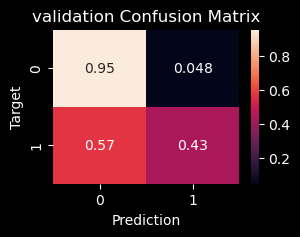

In [96]:
cf = confusion_matrix(y_val, gaussianNB_y_pred_val, normalize='true')
plt.figure(figsize=(3,2))
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('validation'));

Naive Bayes memiliki akurasi yang cukup baik, namun akurasi yang dimiliki oleh naive bayes lebih rendah dibandingkan dengan Logistic Regression
<br>
Dalam Confusion matrix naive bayes, dengan response spam, prediksi spam sebagai non spam membuat akurasi dari model ini kurang baik untuk digunakan dikarenakan kesalahan prediksi yang digambarkan pada confusion matrix

In [97]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

LDA METHOD

In [98]:
LDA = LinearDiscriminantAnalysis()

In [99]:
LDA.fit(X_train,y_train)
LDA_y_pred_val = LDA.predict(X_val)

In [100]:
LDA_acc_score = accuracy_score(y_val,LDA_y_pred_val)
print('LDA Accuracy Score: %0.2f'%LDA_acc_score)
# LDA_acc_score

LDA Accuracy Score: 0.75


In [101]:
LDA_y_pred_test = LDA.predict(X_test)

In [102]:
LDA_acc_score_test = accuracy_score(y_test,LDA_y_pred_test)
print("LDA Accuracy Score: %0.2f" %LDA_acc_score_test)

LDA Accuracy Score: 0.76


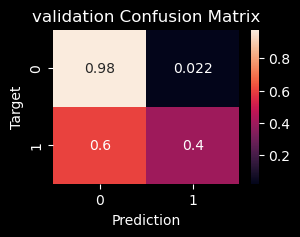

In [103]:
cf = confusion_matrix(y_val, LDA_y_pred_val, normalize='true')
plt.figure(figsize=(3,2))
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('validation'));

LDA memiliki akurasi yang cukup baik, namun akurasi yang dimiliki oleh LDA lebih rendah dibandingkan dengan Logistic Regression
<br>
Dalam Confusion matrix LDA, dengan response spam, prediksi spam sebagai non spam membuat akurasi dari model ini kurang baik untuk digunakan dikarenakan kesalahan prediksi

QDA METHOD

In [104]:
QDA = QuadraticDiscriminantAnalysis()

In [105]:
QDA.fit(X_train,y_train)
QDA_y_pred_val = QDA.predict(X_val)

In [106]:
QDA_acc_score = accuracy_score(y_val,QDA_y_pred_val)
print("QDA Accuracy Score: %0.2f"%QDA_acc_score)

QDA Accuracy Score: 0.75


In [107]:
QDA_y_pred_test = QDA.predict(X_test)

In [108]:
QDA_acc_score_test = accuracy_score(y_test,QDA_y_pred_test)
print("QDA Accuracy Score: %0.2f" %gaussianNB_acc_score_test)

QDA Accuracy Score: 0.75


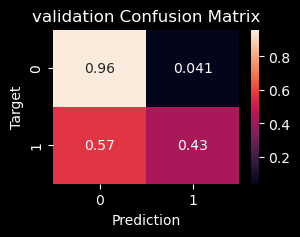

In [109]:
cf = confusion_matrix(y_val, QDA_y_pred_val, normalize='true')
plt.figure(figsize=(3,2))
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('validation'));

QDA memiliki akurasi yang cukup baik, namun akurasi yang dimiliki oleh LDA lebih rendah dibandingkan dengan Logistic Regression
<br>
Dalam Confusion matrix QDA, dengan response spam, prediksi spam sebagai non spam membuat akurasi dari model ini kurang baik untuk digunakan dikarenakan kesalahan prediksi

Kesimpulan dari pemilihan model untuk klasifikasi data email spam

Jika Dibanadingkan dengan model yang lain, Logistic regression memiliki nilai akurasi yang lebih baik dibandingkan dengan model klasifikasi yang lain seperti Gaussian Naive-bayes, LDA,QDA yang memiliki nilai akurasi yang lebih rendah dibandingkan dengan akurasi dari Logistic Regression